In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_2013 = pd.read_csv('psam_p25_2013.csv')
df_2014 = pd.read_csv('psam_p25_2014.csv')
df_2015 = pd.read_csv('psam_p25_2015.csv')
df_2016 = pd.read_csv('psam_p25_2016.csv')
df_2017 = pd.read_csv('psam_p25_2017.csv')
df_2018 = pd.read_csv('psam_p25_2018.csv')
df_2019 = pd.read_csv('psam_p25_2019.csv')
df_2020 = pd.read_csv('psam_p25_2020.csv')
df_2021 = pd.read_csv('psam_p25_2021.csv')

/var/folders/3q/g5yk9cxd5rdc0gry4j6129v40000gn/T/ipykernel_4827/26858416.py:1: DtypeWarning: Columns (109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2013 = pd.read_csv('psam_p25_2013.csv')
/var/folders/3q/g5yk9cxd5rdc0gry4j6129v40000gn/T/ipykernel_4827/26858416.py:2: DtypeWarning: Columns (108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2014 = pd.read_csv('psam_p25_2014.csv')
/var/folders/3q/g5yk9cxd5rdc0gry4j6129v40000gn/T/ipykernel_4827/26858416.py:3: DtypeWarning: Columns (108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2015 = pd.read_csv('psam_p25_2015.csv')
/var/folders/3q/g5yk9cxd5rdc0gry4j6129v40000gn/T/ipykernel_4827/26858416.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv('psam_p25_2018.csv')
/var/folders/3q/g5yk9cxd5rdc0gry4j6129v40000gn/T/ipykernel_4827/26858416.py:7: DtypeWa

In [3]:
# Delete NAN in JWMNP
df_2013 = df_2013.dropna(subset=['JWMNP'])
df_2014 = df_2014.dropna(subset=['JWMNP'])
df_2015 = df_2015.dropna(subset=['JWMNP'])
df_2016 = df_2016.dropna(subset=['JWMNP'])
df_2017 = df_2017.dropna(subset=['JWMNP'])
df_2018 = df_2018.dropna(subset=['JWMNP'])
df_2019 = df_2019.dropna(subset=['JWMNP'])
df_2020 = df_2020.dropna(subset=['JWMNP'])
df_2021 = df_2021.dropna(subset=['JWMNP'])


In [4]:
df_2013.to_csv('psam_p25_2013')
df_2014.to_csv('psam_p25_2015')
df_2015.to_csv('psam_p25_2014')
df_2016.to_csv('psam_p25_2016')
df_2017.to_csv('psam_p25_2017')
df_2018.to_csv('psam_p25_2018')
df_2019.to_csv('psam_p25_2019')
df_2020.to_csv('psam_p25_2020')
df_2021.to_csv('psam_p25_2021')

In [54]:
dataframes = {
    '2013': df_2013,
    '2014': df_2014,
    '2015': df_2015,
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018,
}

average_jwmnp_values = {}

for year, df in dataframes.items():
    # filter JWTRNS=02
    df_filtered = df[df['JWTR'] == 2]

    for rac1p_value in [1, 2]:
        condition = df_filtered['RAC1P'] == rac1p_value
        average_jwmnp = df_filtered[condition]['JWMNP'].mean()
        average_jwmnp_values[f"{year}, RAC1P={rac1p_value}"] = average_jwmnp


In [55]:
dataframes = {
    '2019': df_2019,
    '2020': df_2020,
    '2021': df_2021
}

for year, df in dataframes.items():
    # filter JWTRNS=02
    df_filtered = df[df['JWTRNS'] == 2]

    for rac1p_value in [1, 2]:
        condition = df_filtered['RAC1P'] == rac1p_value
        average_jwmnp = df_filtered[condition]['JWMNP'].mean()
        average_jwmnp_values[f"{year}, RAC1P={rac1p_value}"] = average_jwmnp
        
for key, value in average_jwmnp_values.items():
    print(f"Average JWMNP for {key}: {value}")


Average JWMNP for 2013, RAC1P=1: 38.30573248407644
Average JWMNP for 2013, RAC1P=2: 47.769911504424776
Average JWMNP for 2014, RAC1P=1: 38.98692810457516
Average JWMNP for 2014, RAC1P=2: 45.735264735264735
Average JWMNP for 2015, RAC1P=1: 39.831717451523545
Average JWMNP for 2015, RAC1P=2: 46.01587301587302
Average JWMNP for 2016, RAC1P=1: 40.03766413268832
Average JWMNP for 2016, RAC1P=2: 45.56928508384819
Average JWMNP for 2017, RAC1P=1: 40.3446385748544
Average JWMNP for 2017, RAC1P=2: 45.95731153496821
Average JWMNP for 2018, RAC1P=1: 40.648849797023004
Average JWMNP for 2018, RAC1P=2: 46.08083560399637
Average JWMNP for 2019, RAC1P=1: 40.925135501355015
Average JWMNP for 2019, RAC1P=2: 45.685009487666036
Average JWMNP for 2020, RAC1P=1: 40.475467289719624
Average JWMNP for 2020, RAC1P=2: 44.53224043715847
Average JWMNP for 2021, RAC1P=1: 40.74730215827338
Average JWMNP for 2021, RAC1P=2: 44.737041719342606


In [56]:
total_travel_time = {}
for key, average_jwmnp in average_jwmnp_values.items():
    # Using the formula (Average JWMNP * 2 * 5 * 50) / 60
    yearly_travel_time = (average_jwmnp * 2 * 5 * 50) / 60
    total_travel_time[key] = yearly_travel_time
total_travel_time

{'2013, RAC1P=1': 319.2144373673036,
 '2013, RAC1P=2': 398.0825958702065,
 '2014, RAC1P=1': 324.8910675381264,
 '2014, RAC1P=2': 381.1272061272061,
 '2015, RAC1P=1': 331.9309787626962,
 '2015, RAC1P=2': 383.46560846560845,
 '2016, RAC1P=1': 333.647201105736,
 '2016, RAC1P=2': 379.74404236540164,
 '2017, RAC1P=1': 336.20532145711996,
 '2017, RAC1P=2': 382.9775961247351,
 '2018, RAC1P=1': 338.7404149751917,
 '2018, RAC1P=2': 384.0069633666364,
 '2019, RAC1P=1': 341.0427958446251,
 '2019, RAC1P=2': 380.708412397217,
 '2020, RAC1P=1': 337.29556074766356,
 '2020, RAC1P=2': 371.10200364298726,
 '2021, RAC1P=1': 339.5608513189448,
 '2021, RAC1P=2': 372.80868099452175}

### T Test

In [92]:
# Organizing the data into a structured format for the table
years = sorted(set(key.split(", ")[0] for key in total_travel_time.keys()))
table_data = {year: {'White': None, 'Black': None} for year in years}

for key, value in total_travel_time.items():
    year, race = key.split(", ")
    race = 'White' if race == 'RAC1P=1' else 'Black'
    table_data[year][race] = value

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(table_data, orient='index')
df.index.rename('Year', inplace=True)
df = df.reset_index()

# Exporting to CSV
df.to_csv('T_test.csv')
df

,Year,White,Black
0,2013,319.214437,398.082596
1,2014,324.891068,381.127206
2,2015,331.930979,383.465608
3,2016,333.647201,379.744042
4,2017,336.205321,382.977596
5,2018,338.740415,384.006963
6,2019,341.042796,380.708412
7,2020,337.295561,371.102004
8,2021,339.560851,372.808681


In [104]:
from scipy.stats import ttest_ind

# Converting 'Year' column to integers
df['Year'] = df['Year'].astype(int)

pre_pandemic_data = df[(df['Year'] >= 2014) & (df['Year'] <= 2020)]
during_pandemic_data = df[df['Year'] >= 2020]

# Calculate the difference in commute times for pre-pandemic and during-pandemic
pre_pandemic_diff = pre_pandemic_data['White'] - pre_pandemic_data['Black']
during_pandemic_diff = during_pandemic_data['White'] - during_pandemic_data['Black']

# Perform t-test
t_stat, p_value = ttest_ind(pre_pandemic_diff, during_pandemic_diff, equal_var=False)
t_stat, p_value



(-4.331535857081992, 0.00470223929757063)

In [58]:
# Calculating the difference in total travel time between RAC1P=2 and RAC1P=1 for each year
travel_time_difference = {}

for year in range(2013, 2022):  # Looping through the years 2017 to 2021
    white = f"{year}, RAC1P=1"
    black = f"{year}, RAC1P=2"

    # Calculate the difference if both keys exist in the dictionary
    if white in total_travel_time and black in total_travel_time:
        difference = total_travel_time[black] - total_travel_time[white]
        travel_time_difference[year] = difference
travel_time_difference

{2013: 78.86815850290287,
 2014: 56.2361385890797,
 2015: 51.53462970291224,
 2016: 46.096841259665666,
 2017: 46.772274667615136,
 2018: 45.2665483914447,
 2019: 39.66561655259187,
 2020: 33.8064428953237,
 2021: 33.24782967557695}

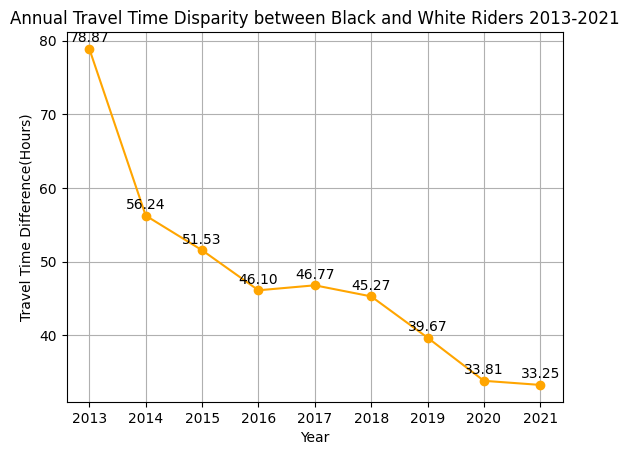

In [97]:
# Extracting years and differences
years = list(travel_time_difference.keys())
differences = list(travel_time_difference.values())

# Plotting the line graph
plt.plot(years, differences, marker='o', linestyle='-', color='orange')
plt.title('Annual Travel Time Disparity between Black and White Riders 2013-2021')
plt.xlabel('Year')
plt.ylabel('Travel Time Difference(Hours)')

# Annotating each point with its numerical value
for year, difference in zip(years, differences):
    plt.annotate(f'{difference:.2f}', (year, difference), textcoords="offset points", xytext=(0, 5), ha='center')

plt.grid(True)
plt.show()

In [84]:
average_difference_2017_2021 = round(sum(travel_time_difference[year] for year in range(2017, 2022)))
average_difference_2017_2021

199

In [85]:
# Calculating the average of the yearly differences from 2017 to 2021
average_difference_2017_2021 = round(sum(travel_time_difference[year] for year in range(2017, 2022)) / 5)
print(f'Bus Commute Disparity between Black and White Riders(2017-2021):', average_difference_2017_2021, f'hours')

Bus Commute Disparity between Black and White Riders(2017-2021): 40 hours


In [86]:
data = total_travel_time

data_rac1p1 = {}
data_rac1p2 = {}

for key, value in data.items():
    year, rac1p = key.replace('Average JWMNP for ', '').split(', RAC1P=')
    if rac1p == '1':
        data_rac1p1[year] = value
    elif rac1p == '2':
        data_rac1p2[year] = value

years_rac1p1 = list(data_rac1p1.keys())
values_rac1p1 = list(data_rac1p1.values())

years_rac1p2 = list(data_rac1p2.keys())
values_rac1p2 = list(data_rac1p2.values())


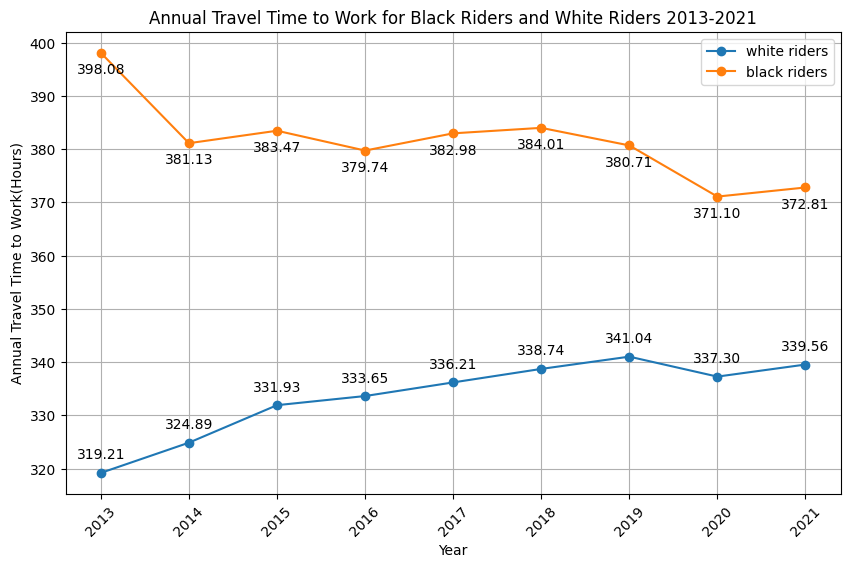

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(years_rac1p1, values_rac1p1, label='white riders', marker='o')
plt.plot(years_rac1p2, values_rac1p2, label='black riders', marker='o')

# Annotate data points with numerical values
for year, value in zip(years_rac1p1, values_rac1p1):
    plt.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0,10), ha='center')

for year, value in zip(years_rac1p2, values_rac1p2):
    plt.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('Year')
plt.ylabel('Annual Travel Time to Work(Hours)')
plt.title('Annual Travel Time to Work for Black Riders and White Riders 2013-2021')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

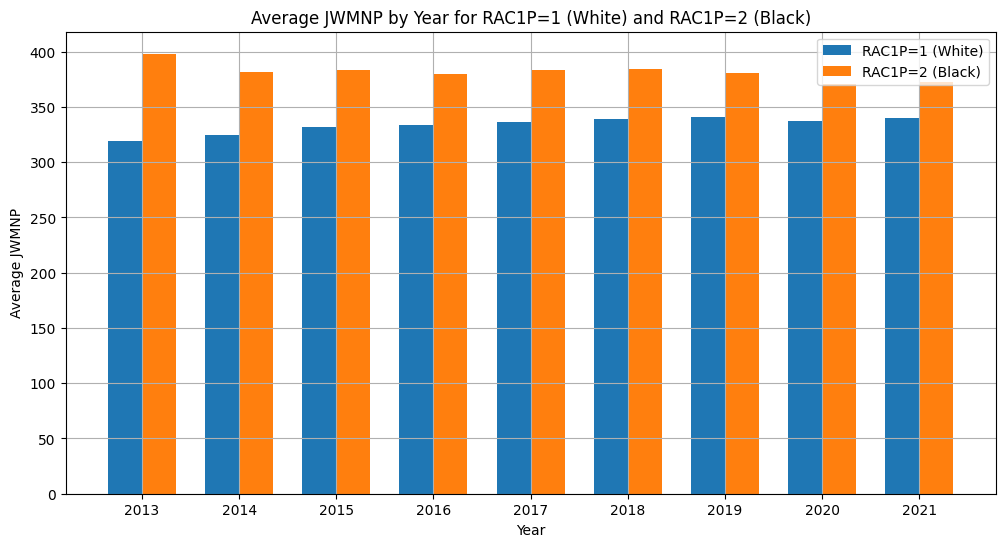

In [88]:

# Drawing a bar chart for average JWMNP of RAC1P=1 (White) and RAC1P=2 (Black) from 2014 to 2021

plt.figure(figsize=(12, 6))

# Setting the bar width
bar_width = 0.35

# Creating an index for each set of bars
index = range(len(years_rac1p1))

# Plotting bars for RAC1P=1 (White)
plt.bar(index, values_rac1p1, bar_width, label='RAC1P=1 (White)')

# Plotting bars for RAC1P=2 (Black) in the next position
plt.bar([i + bar_width for i in index], values_rac1p2, bar_width, label='RAC1P=2 (Black)')

# Adding details to the plot
plt.xlabel('Year')
plt.ylabel('Average JWMNP')
plt.title('Average JWMNP by Year for RAC1P=1 (White) and RAC1P=2 (Black)')
plt.xticks([i + bar_width / 2 for i in index], years_rac1p1)
plt.legend()
plt.grid(True)
plt.show()


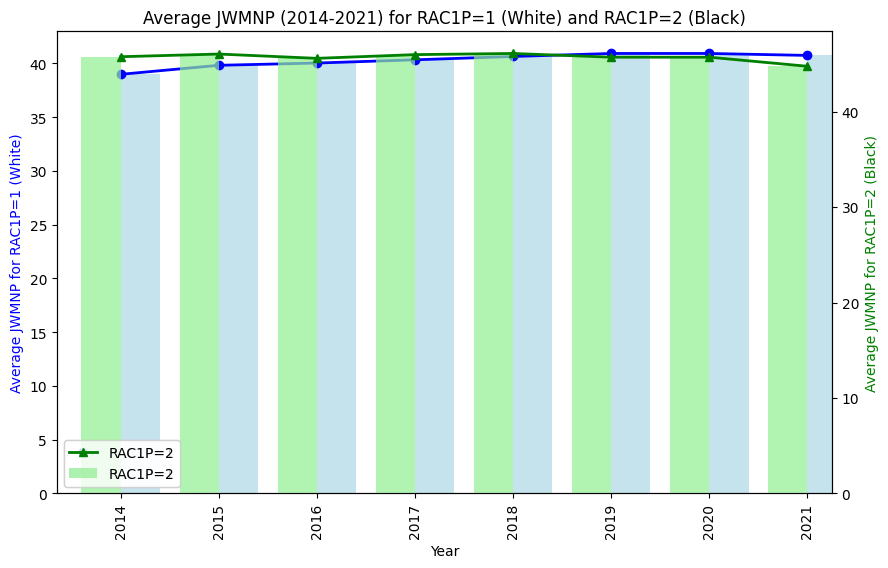

In [89]:
# Your provided data
data = {
    'Year': ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
    'RAC1P=1': [38.99, 39.83, 40.04, 40.34, 40.65, 40.93, 40.93, 40.75],
    'RAC1P=2': [45.74, 46.02, 45.57, 45.96, 46.08, 45.69, 45.69, 44.74]
}
# Convert to DataFrame
df = pd.DataFrame(data)


# Create two axes for bar plots
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Line plot for RAC1P=1 on the first axis
df.plot(x='Year', y='RAC1P=1', kind='line', marker='o', ax=ax1, color='blue', linewidth=2)

# Line plot for RAC1P=2 on the second axis
df.plot(x='Year', y='RAC1P=2', kind='line', marker='^', ax=ax2, color='green', linewidth=2)

# Bar plot for RAC1P=1
df.plot(x='Year', y='RAC1P=1', kind='bar', ax=ax1, color='lightblue', position=0, width=0.4, alpha=0.7)

# Bar plot for RAC1P=2
df.plot(x='Year', y='RAC1P=2', kind='bar', ax=ax2, color='lightgreen', position=1, width=0.4, alpha=0.7)

# Setting labels and titles
ax1.set_xlabel('Year')
ax1.set_ylabel('Average JWMNP for RAC1P=1 (White)', color='blue')
ax2.set_ylabel('Average JWMNP for RAC1P=2 (Black)', color='green')
ax1.set_title('Average JWMNP (2014-2021) for RAC1P=1 (White) and RAC1P=2 (Black)')

plt.show()

